# Neural Networks
In this assignment you will train a neural network to predict the skill of a surgeon performing a fundamental task. The JHU-ISI Gesture and Skill Assessment Working Set [1] [2] is an open-source dataset collected at Johns Hopkins of trainee and expert surgeons performing basic tasks like knot tying, suturing and needle passing with the da Vinci robot[3]. 
<br>

In suturing, surgeons 'stitch up a wound' by passing a needle from one side of the tissue to the other. Check out the included videos to watch the surgeons perform a practice suturing task.
<br> 

In this notebook you will be predicting the skill of the operating surgeon from the suturing kinematics and videos using a <b>2-layer, Temporal Convolutional network</b>[4]. 

### References 
[1] Gao, Yixin, et al. "Jhu-isi gesture and skill assessment working set (jigsaws): A surgical activity dataset for human motion modeling." MICCAI Workshop: M2CAI. Vol. 3. 2014. <br>
[2] https://cirl.lcsr.jhu.edu/research/hmm/datasets/jigsaws_release/ <br> 
[3] https://www.intuitive.com/en-us/products-and-services/da-vinci?gclid=Cj0KCQiAwP3yBRCkARIsAABGiPo79mPGJFNXWFc8tEpuRgU_s61N1zsmGR552MFbJ5C_LW12gXlG8AoaAmlIEALw_wcB <br>
[4] Lea, Colin, et al. "Temporal convolutional networks for action segmentation and detection." proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2017.


## Installation
In this assignment you will use: 
* os, sys for accessing files
* pdb (optional) for debugging
* NumPy for vectorized operations
* matplotlib for plotting
* mpl_toolkits for 3D plotting
* utils_hw3_coding for helper functions
* PyTorch (for implementing back propagation and neural networks)

In [1]:
import os
import sys
import pdb
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utils_hw3_coding import *

In [2]:
import torch
import torch.autograd as autograd
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Read in JIGSAWS Data

In [3]:
jigsaws_path = 'JIGSAW/'

Train, Test = read_jigsaws_data(jigsaws_path)
train_data = Train[0]; train_labels = Train[1]; train_files = Train[2]
test_data  = Test[0];  test_labels  = Test[1];  test_files  = Test[2]

## Convolutional Neural Network

In [4]:
class ConvNet(torch.nn.Module):
    def __init__(self):        
        super(ConvNet, self).__init__()
        # TODO: Fill in the sizes
        self.C1   = torch.nn.Conv1d(6, 10, 5)
        self.C2   = torch.nn.Conv1d(10, 20, 5)
        self.ReLU    = torch.nn.ReLU()
        self.Maxpool = torch.nn.MaxPool1d(2)
        self.Dropout = torch.nn.Dropout(p=0)
        self.L3      = torch.nn.Linear(20*22, 1)
        
    def forward(self, x, batch_size):
        ''' forward pass '''
        # TODO: implement the forward pass
        x = self.ReLU(self.C1(x))
        x = self.Maxpool(x)
        x = self.ReLU(self.C2(x))
        x = self.Maxpool(x)
        x = x.view(batch_size,-1)
        x = self.L3(x)
        return x
#         pass

    def predict(self, x, batch_size):
        ''' predict labels 0/1 '''
        # TODO: implement a predict function that predicts 0 or 1 for each example
        x = self.forward(x, batch_size)
#         label = x.max(1)
        return x
#         pass

In [5]:
''' Set the Training Parameters '''
batch_size  = 100 
window_size = 100
epochs      = 150
learning_rate = 0.0001

In [6]:
model = ConvNet()
# TODO: Select a loss function
# loss_fn = *Binary Cross Entropy* used in Training loop
loss_fn = nn.BCEWithLogitsLoss()
# TODO: Select an optimizer
optimizer = optim.Rprop(model.parameters(), lr=learning_rate)

In [7]:
''' Training Loop  '''
Loss = []
Train_Accuracy = []
Test_Accuracy  = []

for epic in range(epochs):
    model.train()
    window, window_labels = get_cnn_window(train_data, train_labels, window_size, batch_size)
    
    ''' ...... '''
    # TODO: implement training on your network, compute the loss, update weights
    
    ''' ...... '''
    window = torch.from_numpy(window).float()
    window_labels = torch.from_numpy(window_labels).float()
    
    optimizer.zero_grad()
    
    out = model(window, batch_size)
#     loss = F.binary_cross_entropy(out, window_labels)
    loss = loss_fn(out, window_labels)
    loss.backward()
    optimizer.step()
    
    Loss.append(loss.detach().item())
    print("Loss: " + str(loss.detach().item()), end='\r')
    
    if(epic % 10 == 0):
        ''' We have implemented the function compute_cnn_accuracy to help you evaluate your network. 
        It returns the accuracy of the binary skill predictions.'''
        train_accuracy, train_predictions = compute_cnn_accuracy(train_data, train_labels, model, window_size)
        test_accuracy,  test_predictions  = compute_cnn_accuracy(test_data, test_labels, model, window_size)
        Train_Accuracy.append(train_accuracy)
        Test_Accuracy.append(test_accuracy)        

In [8]:
''' Print out the model accuracy after training '''
train_accuracy, train_predictions = compute_cnn_accuracy(train_data, train_labels, model, window_size)
test_accuracy,  test_predictions  = compute_cnn_accuracy(test_data, test_labels, model, window_size)

print("Training Accuracy: " + str(train_accuracy))
print("Testing Accuracy: " + str(test_accuracy))

Training Accuracy: 0.8571428571428571
Testing Accuracy: 0.9090909090909091


In [ ]:
''' Evaluate your Network '''
# plot the loss 
fig = plt.figure()
plt.plot(Loss, label="Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
''' Visualize Accuracy '''
fig = plt.figure()
plt.plot(Train_Accuracy, label="Train_Accuracy")
plt.plot(Test_Accuracy, label="Test_Accuracy")

plt.ylim([0, 1])
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## Written Questions
* We have included a dropout layer in ConvNet. How does changing the probability of setting a neuron to zero change the network performance? Use 2 dropout probabilities you tried in your response. <br><br>

<i> Your response here. </i>

* How does changing the kernel size in the convolutional layers image the network performance? Explain using two kernel sizes you experimented with. <br><br> 

<i> Your response here. </i>

## Improving Performance

Training Accuracy: 0.8571428571428571
Testing Accuracy: 0.9090909090909091


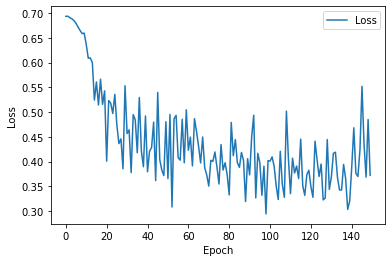

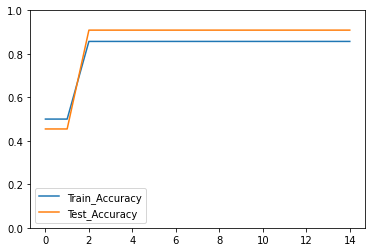

In [11]:
class BestNet(torch.nn.Module):
    def __init__(self):        
        super(BestNet, self).__init__()
        # TODO: Fill in the sizes
        self.C1   = torch.nn.Conv1d(6, 10, 3)
        self.C2   = torch.nn.Conv1d(10, 20, 3)
        self.ReLU    = torch.nn.ReLU()
        self.Maxpool = torch.nn.MaxPool1d(2)
        self.Dropout = torch.nn.Dropout(p=0.2)
        self.L3      = torch.nn.Linear(20*23, 200)
        self.L4      = torch.nn.Linear(200, 1)
        
    def forward(self, x, batch_size):
        ''' forward pass '''
        # TODO: implement the forward pass
        x = self.ReLU(self.C1(x))
        x = self.Maxpool(x)
        x = self.ReLU(self.C2(x))
        x = self.Maxpool(x)
        x = x.view(batch_size,-1)
        x = self.Dropout(x)
        x = self.L3(x)
        x = self.Dropout(x)
        x = self.L4(x)
        return x
#         pass

    def predict(self, x, batch_size):
        ''' predict labels 0/1 '''
        # TODO: implement a predict function that predicts 0 or 1 for each example
        x = self.forward(x, batch_size)
        return x
#         pass


''' Set the Training Parameters '''
batch_size  = 100 
window_size = 100
epochs      = 150
learning_rate = 0.001

model2 = BestNet()
# TODO: Select a loss function
# loss_fn = *Binary Cross Entropy* used in Training loop
loss_fn = nn.BCEWithLogitsLoss()
# TODO: Select an optimizer
optimizer = optim.Rprop(model2.parameters(), lr=learning_rate)



''' Training Loop  '''
Loss = []
Train_Accuracy = []
Test_Accuracy  = []

for epic in range(epochs):
    model2.train()
    window, window_labels = get_cnn_window(train_data, train_labels, window_size, batch_size)
    
    ''' ...... '''
    # TODO: implement training on your network, compute the loss, update weights
    
    ''' ...... '''
    window = torch.from_numpy(window).float()
    window_labels = torch.from_numpy(window_labels).float()
    
    optimizer.zero_grad()
    
    out = model2(window, batch_size)
#     loss = F.binary_cross_entropy(out, window_labels)
    loss = loss_fn(out, window_labels)
    loss.backward()
    optimizer.step()
    
    Loss.append(loss.detach().item())
    print("Loss: " + str(loss.detach().item()), end='\r')
    
    if(epic % 10 == 0):
        ''' We have implemented the function compute_cnn_accuracy to help you evaluate your network. 
        It returns the accuracy of the binary skill predictions.'''
        train_accuracy, train_predictions = compute_cnn_accuracy(train_data, train_labels, model2, window_size)
        test_accuracy,  test_predictions  = compute_cnn_accuracy(test_data, test_labels, model2, window_size)
        Train_Accuracy.append(train_accuracy)
        Test_Accuracy.append(test_accuracy)      
        
        
        
''' Print out the model accuracy after training '''
train_accuracy, train_predictions = compute_cnn_accuracy(train_data, train_labels, model2, window_size)
test_accuracy,  test_predictions  = compute_cnn_accuracy(test_data, test_labels, model2, window_size)

print("Training Accuracy: " + str(train_accuracy))
print("Testing Accuracy: " + str(test_accuracy))


''' Evaluate your Network '''
# plot the loss 
fig = plt.figure()
plt.plot(Loss, label="Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



''' Visualize Accuracy '''
fig = plt.figure()
plt.plot(Train_Accuracy, label="Train_Accuracy")
plt.plot(Test_Accuracy, label="Test_Accuracy")

plt.ylim([0, 1])
plt.legend()
plt.show()

## <i> Extra Credit </i>

In [12]:
class DeeperNet(torch.nn.Module):
    def __init__(self):        
        super(DeeperNet, self).__init__()
        # TODO: Fill in the sizes
        self.C1   = torch.nn.Conv1d(size_1, size_2, size_3)
        self.C2   = torch.nn.Conv1d(size_4, size_5, size_6)
        self.ReLU    = torch.nn.ReLU()
        self.Maxpool = torch.nn.MaxPool1d(2)
        self.Dropout = torch.nn.Dropout(p=0)
        self.L3      = torch.nn.Linear(size_7, size_8)
        
    def forward(self, x, batch_size):
        ''' forward pass '''
        # TODO: implement the forward pass
        pass

    def predict(self, x, batch_size):
        ''' predict labels 0/1 '''
        # TODO: implement a predict function that predicts 0 or 1 for each example
        pass